In [ ]:
# UPI Fraud Detection Pipeline with Multiple Models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.over_sampling import SMOTE

# Load dataset
df = pd.read_csv("synthetic_indian_upi_fraud_data.csv")  # Replace with your actual file path
# Drop irrelevant columns
df.drop(['TransactionID', 'UserID', 'Timestamp', 'PhoneNumber', 'DeviceID', 'IPAddress'], axis=1, inplace=True)

# Encode categorical features
categorical_cols = ['MerchantCategory', 'TransactionType', 'TransactionFrequency', 'BankName']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert boolean-like strings to binary
bool_cols = ['UnusualLocation', 'UnusualAmount', 'NewDevice']
for col in bool_cols:
    df[col] = df[col].astype(bool).astype(int)

# Separate features and target
X = df.drop("FraudFlag", axis=1)
y = df["FraudFlag"].astype(int)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

# Dictionary to store model results
results = {}
all_preds = {}

# 1. XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
results['XGBoost'] = classification_report(y_test, y_pred_xgb, output_dict=True)
all_preds['XGBoost'] = y_pred_xgb

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
results['RandomForest'] = classification_report(y_test, y_pred_rf, output_dict=True)
all_preds['RandomForest'] = y_pred_rf

# 3. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['LogisticRegression'] = classification_report(y_test, y_pred_lr, output_dict=True)
all_preds['LogisticRegression'] = y_pred_lr

# 4. SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
results['SVM'] = classification_report(y_test, y_pred_svm, output_dict=True)
all_preds['SVM'] = y_pred_svm

# 5. Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results['NaiveBayes'] = classification_report(y_test, y_pred_nb, output_dict=True)
all_preds['NaiveBayes'] = y_pred_nb

# 6. K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = classification_report(y_test, y_pred_knn, output_dict=True)
all_preds['KNN'] = y_pred_knn

# 7. CNN (simple feed-forward network)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
cnn_preds = model.predict(X_test)
cnn_preds_class = (cnn_preds > 0.5).astype(int)
results['CNN'] = classification_report(y_test, cnn_preds_class, output_dict=True)
all_preds['CNN'] = cnn_preds_class

# Print all results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, all_preds[model_name]))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:14:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Model: XGBoost
Accuracy: 0.8661
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1824
           1       0.86      0.87      0.87      1790

    accuracy                           0.87      3614
   macro avg       0.87      0.87      0.87      3614
weighted avg       0.87      0.87      0.87      3614


Model: RandomForest
Accuracy: 0.8628
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1824
           1       0.86      0.87      0.86      1790

    accuracy                           0.86      3614
   macro avg       0.86      0.86      0.86      3614
weighted avg       0.86      0.86      0.86      3614


Model: LogisticRegression
Accuracy: 0.6992
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1824
           1

In [ ]:
# Manually use encoded values from the original dataset (row 0)
sample = pd.DataFrame([{
    'Amount': 8589.00,
    'MerchantCategory': df.loc[0, 'MerchantCategory'],        # already encoded
    'TransactionType': df.loc[0, 'TransactionType'],          # already encoded
    'Latitude': 23.354478,
    'Longitude': -40.536076,
    'AvgTransactionAmount': 670.31,
    'TransactionFrequency': df.loc[0, 'TransactionFrequency'],# already encoded
    'UnusualLocation': 0,
    'UnusualAmount': 1,
    'NewDevice': 0,
    'FailedAttempts': 2,
    'BankName': df.loc[0, 'BankName']                         # already encoded
}])

# Scale the sample
sample_scaled = scaler.transform(sample)

# Predict with all models
print("Predictions for Transaction #0 (True Label = Fraud ✅):\n")

for model_name, model in zip(
    ['XGBoost', 'RandomForest', 'LogisticRegression', 'SVM', 'NaiveBayes', 'KNN', 'CNN'],
    [xgb, rf, lr, svm, nb, knn, model]
):
    if model_name == 'CNN':
        pred = (model.predict(sample_scaled) > 0.5).astype(int)[0][0]
    else:
        pred = model.predict(sample_scaled)[0]

    result = "Fraud ❗" if pred == 1 else "Not Fraud ✅"
    print(f"{model_name}: {result}")


Predictions for Transaction #0 (True Label = Fraud ✅):

XGBoost: Fraud ❗
RandomForest: Fraud ❗
LogisticRegression: Fraud ❗
SVM: Fraud ❗
NaiveBayes: Fraud ❗
KNN: Fraud ❗
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
CNN: Fraud ❗


In [ ]:
# Row 1 - FraudFlag = False
sample = pd.DataFrame([{
    'Amount': 9090.54,
    'MerchantCategory': df.loc[1, 'MerchantCategory'],
    'TransactionType': df.loc[1, 'TransactionType'],
    'Latitude': -62.956912,
    'Longitude': -102.511919,
    'AvgTransactionAmount': 7265.96,
    'TransactionFrequency': df.loc[1, 'TransactionFrequency'],
    'UnusualLocation': 0,
    'UnusualAmount': 1,
    'NewDevice': 0,
    'FailedAttempts': 2,
    'BankName': df.loc[1, 'BankName']
}])

# Scale the sample
sample_scaled = scaler.transform(sample)

# Predict with all models
print("Predictions for Transaction #1 (True Label = Not Fraud ✅):\n")

for model_name, model in zip(
    ['XGBoost', 'RandomForest', 'LogisticRegression', 'SVM', 'NaiveBayes', 'KNN', 'CNN'],
    [xgb, rf, lr, svm, nb, knn, model]
):
    if model_name == 'CNN':
        pred = (model.predict(sample_scaled) > 0.5).astype(int)[0][0]
    else:
        pred = model.predict(sample_scaled)[0]

    result = "Fraud ❗" if pred == 1 else "Not Fraud ✅"
    print(f"{model_name}: {result}")


Predictions for Transaction #1 (True Label = Not Fraud ✅):

XGBoost: Not Fraud ✅
RandomForest: Not Fraud ✅
LogisticRegression: Fraud ❗
SVM: Fraud ❗
NaiveBayes: Fraud ❗
KNN: Not Fraud ✅
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
CNN: Fraud ❗


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=params,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model (this may take time)
grid.fit(X_train, y_train)

# Access results
print("Best Parameters:", grid.best_params_)
print("Best F1 Score:", grid.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best F1 Score: 0.8712351754658894


In [ ]:
best_xgb = XGBClassifier(
    colsample_bytree=1,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=0.8,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train, y_train)
y_pred_best = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1824
           1       0.88      0.90      0.89      1790

    accuracy                           0.89      3614
   macro avg       0.89      0.89      0.89      3614
weighted avg       0.89      0.89      0.89      3614



In [ ]:
# Get first 5 rows
head_df = df.head().copy()

# Get indexes of fraud and non-fraud in head
fraud_idx = head_df[head_df["FraudFlag"] == 1].index[0]
nonfraud_idx = head_df[head_df["FraudFlag"] == 0].index[0]

# Extract those rows
fraud_sample = head_df.loc[[fraud_idx]].copy()
nonfraud_sample = head_df.loc[[nonfraud_idx]].copy()

# Store true labels
true_labels = {
    "Fraud": fraud_sample["FraudFlag"].values[0],
    "Not Fraud": nonfraud_sample["FraudFlag"].values[0]
}

# Prepare for prediction
fraud_features = fraud_sample.drop("FraudFlag", axis=1)
nonfraud_features = nonfraud_sample.drop("FraudFlag", axis=1)

# Scale features
fraud_scaled = scaler.transform(fraud_features)
nonfraud_scaled = scaler.transform(nonfraud_features)

# Predict
fraud_pred = best_xgb.predict(fraud_scaled)[0]
nonfraud_pred = best_xgb.predict(nonfraud_scaled)[0]

# Output results
print("\nPrediction for Fraud Sample from df.head():")
print("Predicted:", "Fraud ✅" if fraud_pred == 1 else "Not Fraud ❌", "| True Label:", true_labels["Fraud"])

print("\nPrediction for Non-Fraud Sample from df.head():")
print("Predicted:", "Not Fraud ✅" if nonfraud_pred == 0 else "Fraud ❌", "| True Label:", true_labels["Not Fraud"])



Prediction for Fraud Sample from df.head():
Predicted: Fraud ✅ | True Label: True

Prediction for Non-Fraud Sample from df.head():
Predicted: Not Fraud ✅ | True Label: False


In [ ]:
# prompt: give code for saving xgb boost model

import pickle

# Save the trained XGBoost model
filename = 'xgb_model.pkl'
pickle.dump(best_xgb, open(filename, 'wb'))

# Load the saved model (example)
# loaded_model = pickle.load(open(filename, 'rb'))
# predictions = loaded_model.predict(X_test)


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("synthetic_indian_upi_fraud_data.csv")  # replace with your actual file

# List of categorical columns you want to encode
categorical_columns = ['MerchantCategory', 'TransactionType', 'TransactionFrequency', 'BankName']

# Generate encoding dictionaries
encoding_maps = {}
for col in categorical_columns:
    unique_vals = df[col].dropna().unique()
    encoding_maps[col] = {val: idx for idx, val in enumerate(unique_vals)}

# Display the maps
for col, mapping in encoding_maps.items():
    print(f"\n{col} map:")
    print(mapping)



MerchantCategory map:
{'Electronics': 0, 'Restaurants': 1, 'Groceries': 2, 'Clothing': 3, 'Entertainment': 4, 'Utilities': 5, 'Travel': 6}

TransactionType map:
{'P2M': 0, 'P2P': 1}

TransactionFrequency map:
{'5/day': 0, '3/day': 1, '1/day': 2}

BankName map:
{'Bank of Baroda': 0, 'ICICI Bank': 1, 'State Bank of India': 2, 'Axis Bank': 3, 'Kotak Mahindra Bank': 4, 'HDFC Bank': 5}


<ipython-input-9-3e984180bb1a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


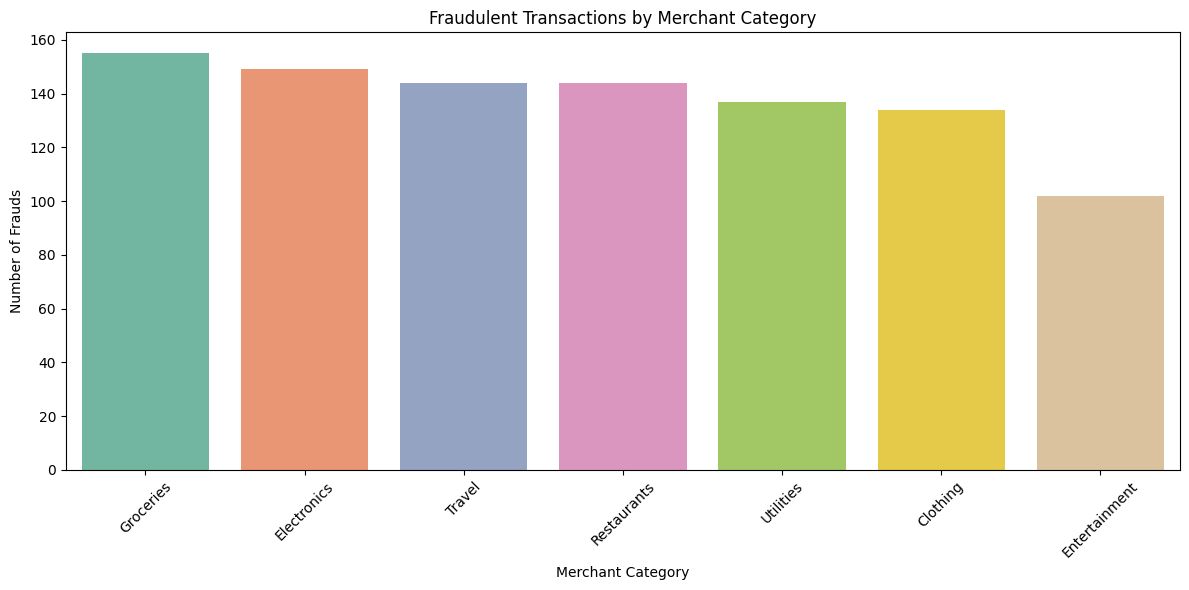

<ipython-input-9-3e984180bb1a>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud, x='TransactionType', palette='Set3')


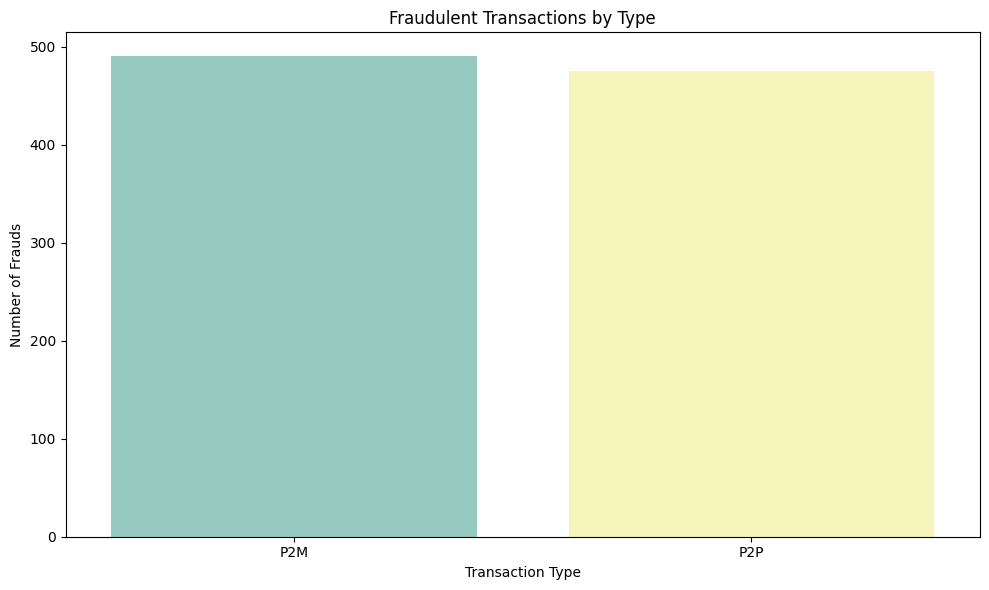

<ipython-input-9-3e984180bb1a>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


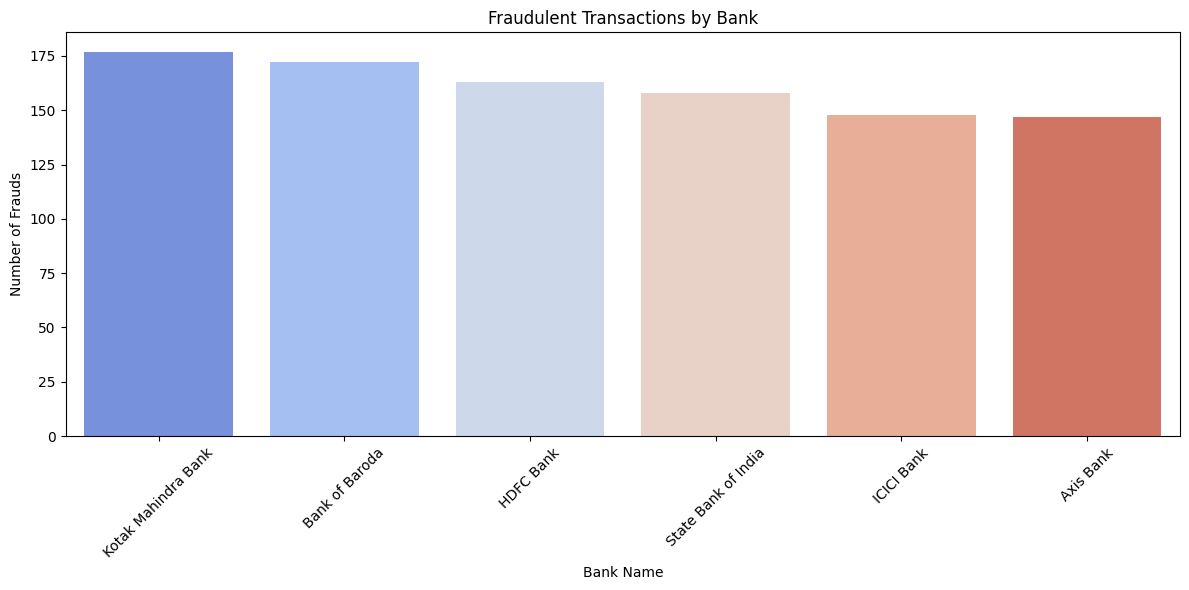

In [ ]:
df = pd.read_csv("synthetic_indian_upi_fraud_data.csv")  # Replace with your actual file pathimport matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Filter fraud cases from original DataFrame
fraud = df[df["FraudFlag"] == 1]

# Plot 1: Fraud Distribution by Merchant Category
plt.figure(figsize=(12, 6))
sns.countplot(
    data=fraud,
    x='MerchantCategory',
    palette='Set2',
    order=fraud['MerchantCategory'].value_counts().index
)
plt.title('Fraudulent Transactions by Merchant Category')
plt.xticks(rotation=45)
plt.xlabel("Merchant Category")
plt.ylabel("Number of Frauds")
plt.tight_layout()
plt.show()

# Plot 2: Fraud by Transaction Type
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud, x='TransactionType', palette='Set3')
plt.title('Fraudulent Transactions by Type')
plt.xlabel("Transaction Type")
plt.ylabel("Number of Frauds")
plt.tight_layout()
plt.show()

# Plot 3: Fraud by Bank
plt.figure(figsize=(12, 6))
sns.countplot(
    data=fraud,
    x='BankName',
    palette='coolwarm',
    order=fraud['BankName'].value_counts().index
)
plt.title('Fraudulent Transactions by Bank')
plt.xlabel("Bank Name")
plt.ylabel("Number of Frauds")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the scaler
joblib.dump(scaler, "scaler.pkl")

# Save the best XGBoost model
joblib.dump(best_xgb, "xgb_model.pkl")


['xgb_model.pkl']